## Purpose
This notebook will visualize the difference in likelihood of functionality depending on installer.


# Import and processing

In [43]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
X_train = pd.read_csv('../data/train_data.csv')
X_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [45]:
y_train = pd.read_csv('../data/train_targets.csv')
y_train

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [46]:
df = X_train.merge(y_train, on='id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [47]:
def compare(column, value, data):
    sample = data[data[column]==value]
    functional_sample = sample[sample['status_group']=='functional']
    percent_funct_sample = (len(functional_sample)/len(sample))*100

    funct_all = data[data['status_group']=='functional']
    percent_funct_all = (len(funct_all)/len(data))*100
    
    fig, ax = plt.subplots(1,1,figsize=(8,8))
    ax.set_ylim(0,100)
    sns.barplot(x=[f'{column} equal to {value}', 'All Management Types'], y=[percent_funct_sample, percent_funct_all])

### 1. Installer

In [52]:
df.installer.value_counts()[:15]

DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
CES                     610
Community               553
DANID                   552
District Council        551
HESAWA                  539
Name: installer, dtype: int64

In [86]:
plt.style.use('ggplot')

government = df[(df['installer']=='Central government')|(df['installer']=='Government')]
functional_gov = government[government['status_group']=='functional']
percent_funct_gov = (len(functional_gov)/len(government))*100

community = df[(df['installer']=='Commu')|(df['installer']=='Community')]
functional_com = community[community['status_group']=='functional']
percent_funct_com = (len(functional_com)/len(community))*100

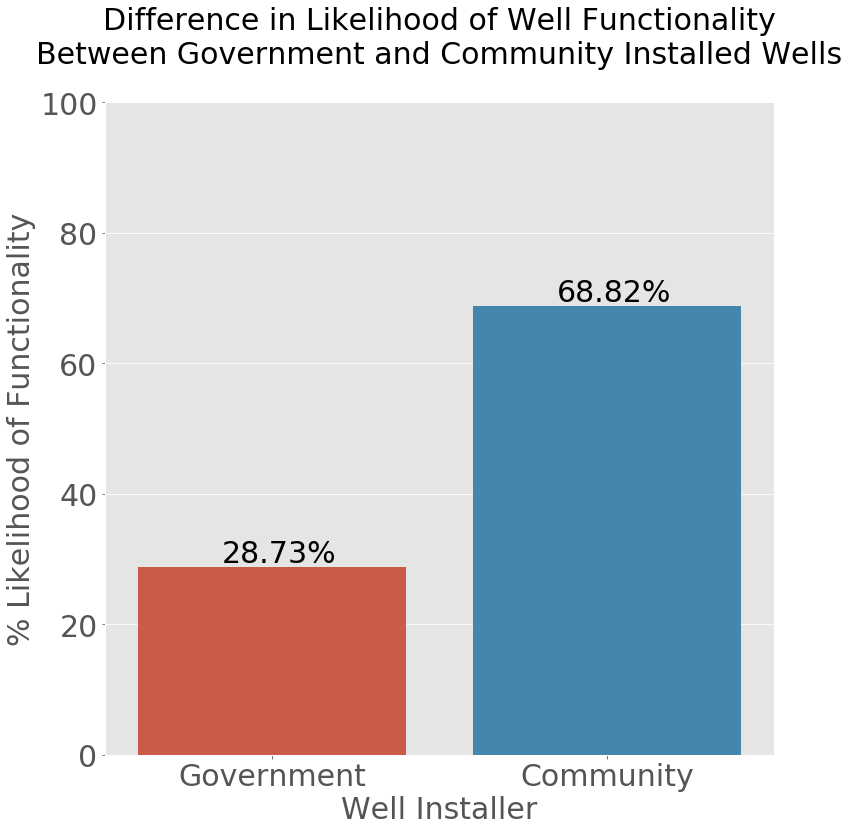

In [87]:
y=[percent_funct_gov, percent_funct_com]

fig, ax = plt.subplots(1,1,figsize=(12,12))

ax.set_title('Difference in Likelihood of Well Functionality\nBetween Government and Community Installed Wells\n', fontsize = 30)
ax.set_xlabel('Well Installer', fontsize=30)
ax.set_ylabel('% Likelihood of Functionality', fontsize=30)
ax.set_ylim(0,100)
ax.tick_params(labelsize=30)

for i in range(2):
    plt.text(x = i-.15 , y =y[i]+.8, s = str(round(y[i], 2))+'%', size = 30)

sns.barplot(x=[f'Government', 'Community'], y=y)
plt.savefig('../reports/figures/installer.png', transparent=True)